---
# Documentation: https://wowchemy.com/docs/managing-content/

title: "FDI, Industri, dan kebijakan perdagangan"
subtitle: ""
summary: ""
authors: [admin]
tags: [ekonomi, python, perdagangan, industri]
categories: [ekonomi, python, perdagangan, industri]
date: 2020-11-11T21:17:11+11:00
lastmod: 2020-11-11T21:17:11+11:00
featured: false
draft: false

# Featured image
# To use, add an image named `featured.jpg/png` to your page's folder.
# Focal points: Smart, Center, TopLeft, Top, TopRight, Left, Right, BottomLeft, Bottom, BottomRight.
image:
  caption: ""
  focal_point: ""
  preview_only: false

# Projects (optional).
#   Associate this post with one or more of your projects.
#   Simply enter your project's folder or file name without extension.
#   E.g. `projects = ["internal-project"]` references `content/project/deep-learning/index.md`.
#   Otherwise, set `projects = []`.
projects: []
---

Postingan kali ini akan membahas sedikit tentang perkembangan FDI di Indonesia.

## Perkembangan FDI Sejak 1970

Grafik di bawah ini menunjukkan net inflows FDI Indonesia dalam % PDB. Sumber data yang saya gunakan adalah World Bank World Development Indicators.

In [2]:
import wbdata as wb
import pandas as pd
import datetime
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

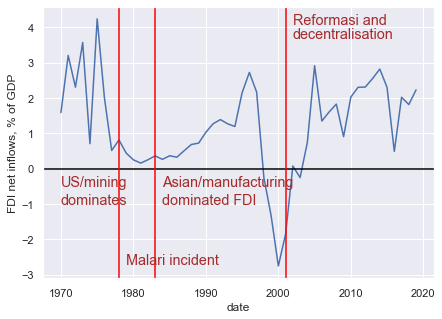

In [3]:
tanggal=(datetime.datetime(1970,1,1), datetime.datetime(2019,1,1))
a=wb.get_dataframe({"BX.KLT.DINV.WD.GD.ZS" : "FDI net inflows, % of GDP"}, country=["IDN"], data_date=tanggal, convert_date=True, keep_levels=True)
a=a.reset_index()
b=wb.get_dataframe({"TX.MNF.TECH.ZS.UN" : "High-tech export"}, country=["IDN"], data_date=tanggal, convert_date=True, keep_levels=True)
b=b.reset_index()
c=wb.get_dataframe({"SL.EMP.TOTL.SP.NE.ZS" : "Employment-to-population ratio, right"}, country=["IDN"], data_date=tanggal, convert_date=True, keep_levels=True)
c=c.reset_index()
d=wb.get_dataframe({"SL.UEM.TOTL.NE.ZS" : "Employment-to-population ratio, right"}, country=["IDN"], data_date=tanggal, convert_date=True, keep_levels=True)
d=d.reset_index()
plt.figure(figsize=(7,5))
graph1=sns.lineplot(x="date", y="FDI net inflows, % of GDP",data=a)
graph1.axhline(0, color='black')
graph1.axvline(datetime.datetime(1978,1,1), color='red')
graph1.text(datetime.datetime(1979,1,1),-2.7, "Malari incident",color='brown',size='large')
graph1.text(datetime.datetime(1970,1,1),-0.5, "US/mining",color='brown',size='large')
graph1.text(datetime.datetime(1970,1,1),-1, "dominates",color='brown',size='large')
graph1.axvline(datetime.datetime(1983,1,1), color='red')
graph1.text(datetime.datetime(1984,1,1),-0.5, "Asian/manufacturing",color='brown',size='large')
graph1.text(datetime.datetime(1984,1,1),-1, "dominated FDI",color='brown',size='large')
graph1.axvline(datetime.datetime(2001,1,1), color='red')
graph1.text(datetime.datetime(2002,1,1),4.1, "Reformasi and",color='brown',size='large')
graph1.text(datetime.datetime(2002,1,1),3.7, "decentralisation",color='brown',size='large')
plt.show()

Gambar di atas juga dibarengi dengan narasi yang disampaikan oleh Linblad (2015). Menurut beliau, ada paling tidak tiga pembagian besar narasi FDI di Indonesia. Pertama adalah sebelum tahun 1985 (oil boom), sesudah 1985 sampai pada saat krisis, dan reformasi.

## FDI dan industri teknologi tinggi

Sekali lagi saya menggunakan data World Development Indicator. Saya coba cari indikator yang ada kata kunci high-tech, dan WDI memunculkan empat indikator di bawah ini:

In [4]:
wb.search_indicators('high-tech',source=2)

id                 name
-----------------  ------------------------------------------------------------------------------------
NV.MNF.TECH.ZS.UN  Medium and high-tech Industry (including construction) (% manufacturing value added)
TX.MNF.TECH.ZS.UN  Medium and high-tech exports (% manufactured exports)
TX.VAL.TECH.CD     High-technology exports (current US$)
TX.VAL.TECH.MF.ZS  High-technology exports (% of manufactured exports)

Saya menggunakan yang pertama untuk visualisasi di bawah ini. 

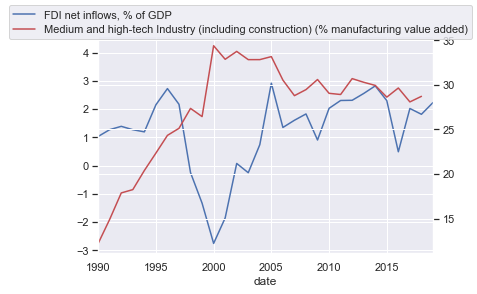

In [5]:
tanggul=(datetime.datetime(1990,1,1), datetime.datetime(2019,1,1))
p=wb.get_dataframe({"TX.MNF.TECH.ZS.UN" : "Medium and high-tech Industry (including construction) (% manufacturing value added)"}, country=["IDN"], data_date=tanggul, convert_date=True, keep_levels=True)
p=p.reset_index()
ax = a.plot(x="date", y="FDI net inflows, % of GDP", legend=False)
ax2 = ax.twinx()
p.plot(x="date", y="Medium and high-tech Industry (including construction) (% manufacturing value added)", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

Sepertinya FDI dan pertumbuhan teknologi tinggi di industri manufaktur tidak begitu ada hubungannya. Malah kayaknya kebalik: ketika ada FDI naik sebagai persen PDB, manufaktur teknologi tinggi malah berkurang. Tentu saja di manufaktur juga ada konstruksi dan juga pengolahan CPO. Selain itu, FDI-nya juga masuk ke industri pertambangan dan servis seperti e-commerce dan perbankan. Bisa jadi FDI-nya bukannya masuk ke industri teknologi tinggi, malah masuk ke industri-industri yang nilai tambah teknologi tinggi-nya rendah. Wajar, FDI akan masuk ke industri yang paling menguntungkan, dan ketika industri tersebut maju, faktor produksi akan masuk ke sana. Pertumbuhan industri teknologi tinggi jatuh pada 2005 dan tidak naik-naik lagi. 2005-an inilah puncak-puncaknya commodity boom dan so-called 'sunset industry'.

## Dua Non-Tariff Measures (NTM): TKDN dan Export Ban

TKDN adalah (Tingkat Komponen Dalan Negeri). Salah satu TKDN yang sangat ramai adalah soal Smartphone.

Gambar di bawah ini menunjukkan realisasi FDI (sumber: BKPM) di industri elektronika, piranti lunak, dan IT. TKDN untuk smartphone diwajibkan pada tahun 2016. Dapat kita lihat, FDI di tiga industri ini tiba-tiba meroket setelah 2016. 

<Figure size 504x360 with 0 Axes>

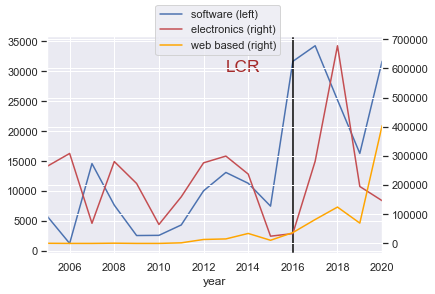

In [6]:
import pandas as pd
pd.set_option('max_rows', None)
import pandas as pd
import datetime
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
aa=pd.read_csv("pma.csv")
aa=aa.fillna(0) # replace NaN with zero
b=list(aa.columns.values)
del b[0]
aa=aa.melt(id_vars='PMA',value_vars=b) # melt so time columns become 1 columns only
aa=aa.rename(columns={"variable" : "year", "value" : "kUSD"})
aa['year']=pd.to_datetime(aa['year']) # change variable to time variable
aa=aa.loc[aa['year'] > datetime.datetime(2004,1,1)]
z=aa.PMA.unique() # bikin list buat jenis PMA
aa=aa.set_index('PMA')
b=aa.loc[[z[27],z[54]]]
elektronik=aa.loc[z[27]]
elektronik=elektronik.rename(columns={'kUSD' : 'electronics (right)'})
it=aa.loc[z[54]]
it=it.rename(columns={'kUSD' : 'software (left)'})
itu=aa.loc[z[55]]
itu=itu.rename(columns={'kUSD' : 'web based (right)'})
b=b.reset_index()
plt.figure(figsize=(7,5))
ax = it.plot(x="year", y="software (left)", legend=False)
ax2 = ax.twinx()
elektronik.plot(x="year", y="electronics (right)", ax=ax2, legend=False, color="r")
itu.plot(x="year", y="web based (right)", ax=ax2, legend=False, color="orange")
ax.axvline(datetime.datetime(2016,1,1), color='black')
ax.text(datetime.datetime(2013,1,1),30000, "LCR",color='brown',size='x-large')
ax.figure.legend(loc=9)
plt.show()

Di bawah ini adalah larangan ekspor mineral. Pada 2014 ekspor ini dilarang, meskipun direlaksasi pada 2017. Investasi logam dasar meningkat, sementara pertambangan bijih logam berkurang. Investor sepertinya masuk ke pengolahan mineral gara-gara larangan ekspor barang mentah.

Text(2017-01-01 00:00:00, 300000, 'Relaxed')

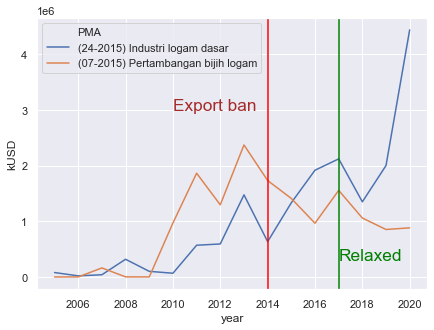

In [8]:
#a=a.set_index('PMA')
c=aa.loc[[z[25],z[8]]]
c=c.reset_index()
logam=aa.loc[z[25]]
tambang=aa.loc[z[8]]
plt.figure(figsize=(7,5))
fak=sns.lineplot(x="year", y="kUSD",data=c, hue="PMA")
fak.axvline(datetime.datetime(2014,1,1), color='red')
fak.text(datetime.datetime(2010,1,1),3000000, "Export ban",color='brown',size='x-large')
fak.axvline(datetime.datetime(2017,1,1), color='green')
fak.text(datetime.datetime(2017,1,1),300000, "Relaxed",color='green',size='x-large')

## Bagaimana dengan FDI dan pertumbuhan industri?

kali ini saya pake World Bank Global Economic Monitor (GEM) untuk mendapatkan pertumbuhan industri di Indonesia. Karena dalam constant USD, saya ubah jadi growth aja ($\Delta log$), meskipun masih tidak ideal.

In [7]:
wb.search_indicators('industrial production',source=15)

id         name
---------  -----------------------------------------------
IPTOTNSKD  Industrial Production, constant US$
IPTOTSAKD  Industrial Production, constant US$, seas. adj.

<function matplotlib.pyplot.show(*args, **kw)>

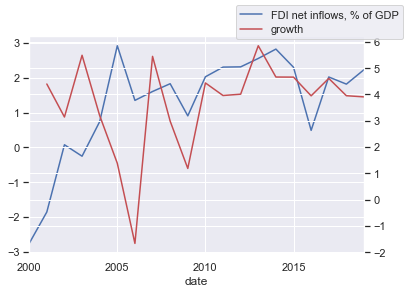

In [9]:
import numpy as np
tanggul=(datetime.datetime(2000,1,1), datetime.datetime(2019,1,1))
aaa=wb.get_dataframe({"BX.KLT.DINV.WD.GD.ZS" : "FDI net inflows, % of GDP (left)"}, country=["IDN"], data_date=tanggul, convert_date=True, keep_levels=True)
aaa=aaa.reset_index()
ip=wb.get_dataframe({"IPTOTSAKD" : "in"}, country=['IDN'], data_date=tanggul, convert_date=True, keep_levels=True)
ip=ip.reset_index()
ip['lin']=np.log(ip['in'])
ip=ip.sort_values(by='date')
ip['Industrial growth (right)']=ip.lin.diff()*100
ip
ax = aaa.plot(x="date", y="FDI net inflows, % of GDP (left)", legend=False)
ax2 = ax.twinx()
ip.plot(x="date", y="Industrial growth (right)", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show

pertumbuhan industri, seperti kita lihat di atas, sempat negatif pada 2006. Selanjutnya cukup stagnan di sekitaran 4-5%. Sepertinya tidak ada hubungannya dengan FDI. Balik lagi, bisa jadi FDI-nya masuk bukan di industri manufaktur.